<a href="https://colab.research.google.com/github/Mahanama90/ceri8211globalgeophysics./blob/master/Gravity_Anomaly_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Global Gravity Anomaly map/ Homework 02/ A.Mahanama

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

In [5]:
from google.colab import drive # Mounting Google Drivre locally 'https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd'
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
with open('/content/drive/My Drive/Global_HW2/GGM05C_data.txt', 'r') as f: # Reading eddited data set of GCM05C (I have removed the header lines & only kept the data set)
  lines = f.readlines()

lines = [line.split() for line in lines[0:]]
Ind = np.array([[int(x)   for x in line[1:3]] for line in lines])
Co  = np.array([[float(x.replace('D', 'E')) for x in line[3:5]] for line in lines])
j = np.complex(0, 1)
Ccomplex = (np.array([1, -j]) * Co).sum(axis=1) # Generating complex coefficents, continue with the real part of it later in the sperical harmonics


In [0]:
# Compute spherical harmonics "Extracted from the given code: SphericalHarmonics.ipynb"
ph         = np.linspace(0,  np.pi,    180)
th         = np.linspace(0,  2*np.pi, 360)
phi, theta = np.meshgrid(ph, th, indexing='ij')

harmonics = []
nmax = 10 # Max degree
for (n, m), Cstar in zip(Ind, Ccomplex): # Order (m) degree (n)
    if n > nmax:
      break
    Y = sph_harm(m, n, theta, phi)
    harmonics.append((n, m, (Y * Cstar).real)) 
    


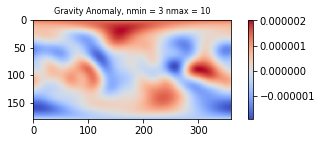

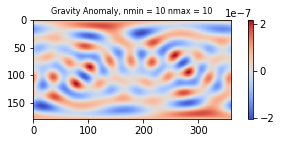

In [53]:
#  Gravity anomalies
degreelim = (3, 10) # Started from 3 to get away from the dominant ellipsoidal effect

DeltaGs = []

for nmin in degreelim:
    count = 0
    DeltaG = np.zeros_like(phi)
    for n, m, h in harmonics:
        if n >= nmin:
            DeltaG += h
            count += 1
    DeltaGs.append(DeltaG)

if True:
    plt.figure()
    for i, (nmin, DeltaG) in enumerate(zip(degreelim, DeltaGs)):
        m= len(DeltaGs)
        plt.subplot(m, 1,i+1)
        plt.imshow(DeltaG, cmap='coolwarm')
        plt.title('Gravity Anomaly, nmin = ' + str(nmin) + ' nmax = ' + str(nmax), fontsize = 8)
        plt.colorbar()
        plt.show()

In [0]:
# Compute spherical harmonics "Extracted from the given code: SphericalHarmonics.ipynb"
ph         = np.linspace(0,  np.pi,    180)
th         = np.linspace(0,  2*np.pi, 360)
phi, theta = np.meshgrid(ph, th, indexing='ij')

harmonics = []
nmax = 60 # Max degree
for (n, m), Cstar in zip(Ind, Ccomplex): # Order (m) degree (n)
    if n > nmax:
      break
    Y = sph_harm(m, n, theta, phi)
    harmonics.append((n, m, (Y * Cstar).real)) 

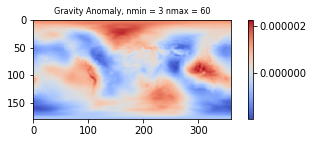

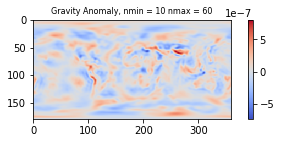

In [55]:
#  Gravity anomalies
degreelim = (3, 10) # Started from 3 to get away from the dominant ellipsoidal effect

DeltaGs = []

for nmin in degreelim:
    count = 0
    DeltaG = np.zeros_like(phi)
    for n, m, h in harmonics:
        if n >= nmin:
            DeltaG += h
            count += 1
    DeltaGs.append(DeltaG)

if True:
    plt.figure()
    for i, (nmin, DeltaG) in enumerate(zip(degreelim, DeltaGs)):
        plt.subplot(len(DeltaGs), 1, i+1)
        plt.imshow(DeltaG, cmap='coolwarm')
        plt.title('Gravity Anomaly, nmin = ' + str(nmin) + ' nmax = ' + str(nmax), fontsize = 8)
        plt.colorbar()
        plt.show()

Compared to the degree 10 map, degree 60 map exaggerate the gravity changes. It should be due to considering the higher degree spherical harmonics.